<a href="https://colab.research.google.com/github/mrlncredible/balakin_rep/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D0%BE%D0%B9_%D1%86%D0%B8%D1%84%D1%80%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

# Модель распознавания рукописной цифры

## Подготовка данных

In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Dropout # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image, ImageOps #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [ ]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)

In [ ]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [ ]:
print(y_train[0]) #Выводим пример одного выходного вектора

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создание нейронной сети


In [ ]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов  
model.add(Dense(400, activation="sigmoid"))
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_233 (Dense)           (None, 800)               628000    
                                                                 
 dense_234 (Dense)           (None, 400)               320400    
                                                                 
 dense_235 (Dense)           (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейронной сети

In [ ]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2678 - accuracy: 0.9217
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0911 - accuracy: 0.9723
Epoch 3/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0569 - accuracy: 0.9826
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0393 - accuracy: 0.9882
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0263 - accuracy: 0.9922


In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

## Распознавание рукописных цифр

In [ ]:
files.upload() #Загружаем фото в Colaboratory

In [ ]:
img = image.load_img(path = '4.jpg', target_size=(28, 28), color_mode = 'grayscale') #Загружаем картинку в переменную
print(img)

<PIL.Image.Image image mode=L size=28x28 at 0x7F8042249950>


In [ ]:
img = image.img_to_array(img) #Преобразуем картинку в numpy-массив
img_inverted = 1 - img[:] #Выполняем инверсию цвета в массива
print(img_inverted.shape)

(28, 28, 1)


In [ ]:
img_inverted = img_inverted.reshape(28,28)
print(img_inverted.shape)

(28, 28)


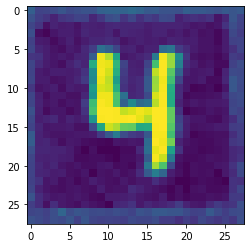

In [ ]:
plt.imshow(img_inverted) #Отрисовка картинки
plt.show()

In [ ]:
renew_img = img_inverted.reshape(1,784) #Выполняем reshape массива 
print(img.shape)
print(renew_img.shape)

(28, 28, 1)
(1, 784)


In [ ]:
#Нормализация входной картинки
renew_img = renew_img.astype('float32') #Преобразуем в renew_img в тип float
renew_img = renew_img/255 #Делим на 255 чтобы диапазон был от 0 до 1

In [ ]:
prediction = model.predict(renew_img) #Распознаём пример
print('Результат:', prediction)

Результат: [[1.3508067e-06 2.4298122e-02 2.4445492e-06 9.0762069e-07 6.9785291e-01
  4.2416502e-04 8.4972550e-07 1.9306016e-01 8.0158948e-08 8.4358945e-02]]


In [ ]:
sum(prediction[0])

0.9999999347675228

In [ ]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print('НС распознала число', pred)

НС распознала число 4


Распознаёт 4 и 7.
Пробовал менять размер банча и количество эпох. Ещё поэкспериментировал со слоями и функциями активации(получалось ещё хуже). В итоге изенил только количетво эпох и функцию активации второго слоя (relu сменил на sigmoid).